In [2]:
# libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
import arabic_reshaper
from bidi.algorithm import get_display
import codecs

### read and explore data

In [3]:
## read data without live videos
df = pd.read_csv("hessas_nolive.csv")
df.head()

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative
0,2021-09-06T04:18:01+0000,Mohammed Adel,271594718130347_271821218107697,NaN,Mohammed Adel,T,neutral,0.00,1.00,0.00
1,2021-09-05T19:13:35+0000,مش بيجي منها حاجة ارحمونا بقى,271594718130347_271610824795403,NaN,Nothing comes of it. Have mercy on us,F,negative,0.21,0.24,0.55
2,2021-09-06T05:06:15+0000,الفيزياء,271594718130347_271840278105791,NaN,Physics,F,neutral,0.13,0.83,0.04
3,2021-09-06T00:02:03+0000,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,271594718130347_271721658117653,NaN,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,T,neutral,0.00,1.00,0.00
4,2021-09-05T19:06:33+0000,نهايه رحله,271594718130347_271608141462338,NaN,the end of the trip,F,neutral,0.10,0.86,0.04


### explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14870 entries, 0 to 14869
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_time  14870 non-null  object 
 1   message       14870 non-null  object 
 2   id            14870 non-null  object 
 3   from          43 non-null     object 
 4   Translate     14867 non-null  object 
 5   is_human      14870 non-null  object 
 6   sentment      14870 non-null  object 
 7   positive      14870 non-null  float64
 8   neutral       14870 non-null  float64
 9   negative      14870 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [5]:
df.describe()

,positive,neutral,negative
count,14870.000000,14870.000000,14870.000000
mean,0.124010,0.757987,0.118003
std,0.249091,0.343985,0.261390
min,0.000000,0.000000,0.000000
25%,0.000000,0.680000,0.000000
50%,0.010000,0.930000,0.010000
75%,0.120000,1.000000,0.060000
max,1.000000,1.000000,1.000000


### fix the data 

In [6]:
# drop embity columne
df.drop("from", axis = 1, inplace = True)

In [7]:
## fix time dtypes
df.created_time =  df["created_time"].str.slice(0, 10)
df["date"] = df["created_time"].str.slice(0, 7)
df.created_time

0        2021-09-06
1        2021-09-05
2        2021-09-06
3        2021-09-06
4        2021-09-05
            ...    
14865    2020-12-11
14866    2020-12-15
14867    2020-12-06
14868    2021-01-10
14869    2021-08-01
Name: created_time, Length: 14870, dtype: object

### filter data with human mentions and over rating

In [9]:
## drop human data
hdf = df.query('is_human != "T"')

## chose data without over rating
nudf = hdf.query('neutral < 0.7')

no need for this plot bit it's here

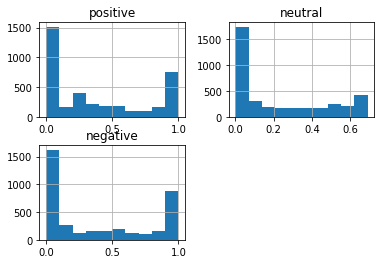

In [14]:
_ = nudf.hist()

### draw the total interactionscolors = sns.color_palette()

In [17]:
colors = sns.color_palette()

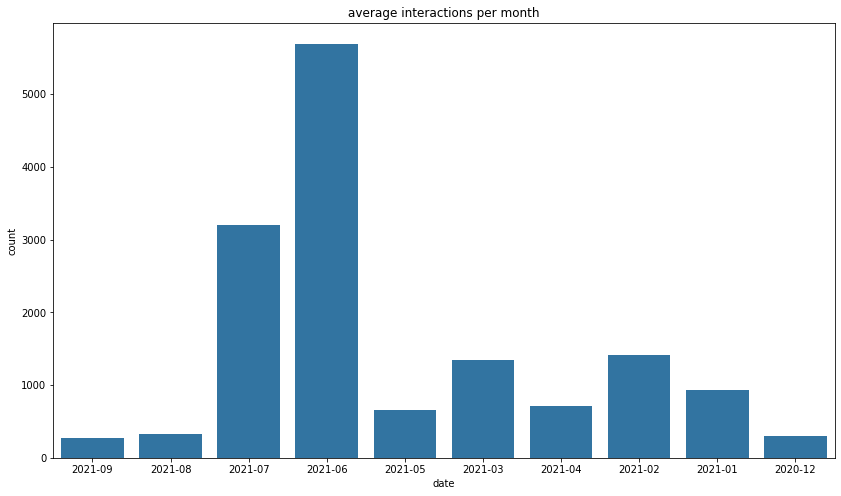

In [18]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = df,x = "date", color = colors[0])
_ = plt.ylabel("interactions count")
_ = plt.ylabel("count")
_ = plt.title(" average interactions per month ")

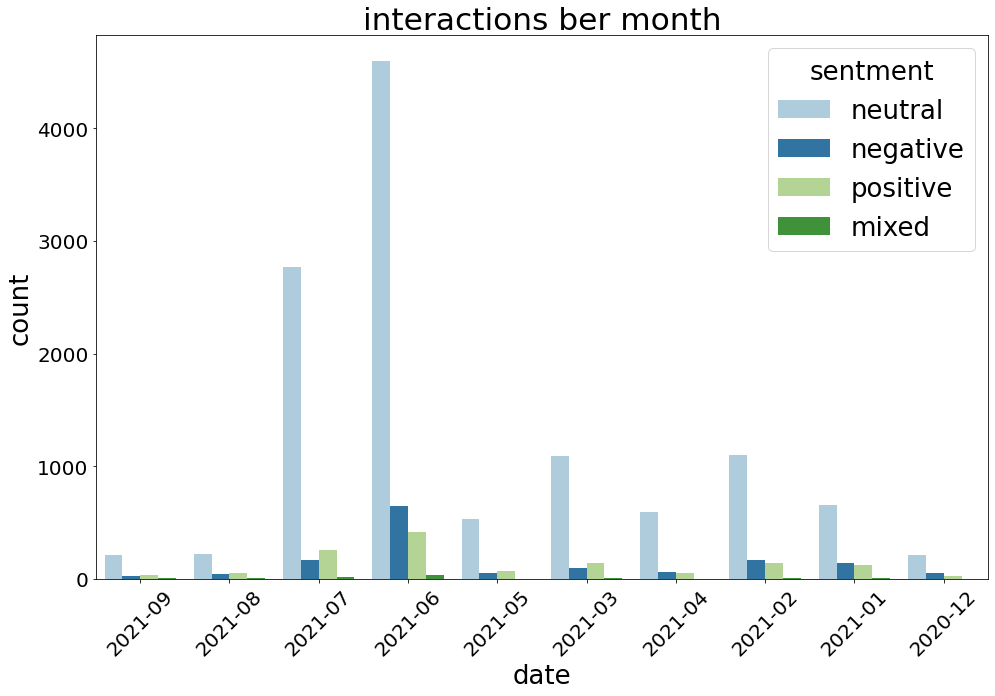

In [37]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = df, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month')
plt.rcParams.update({'font.size':26})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
_ = plt.ylabel("count")

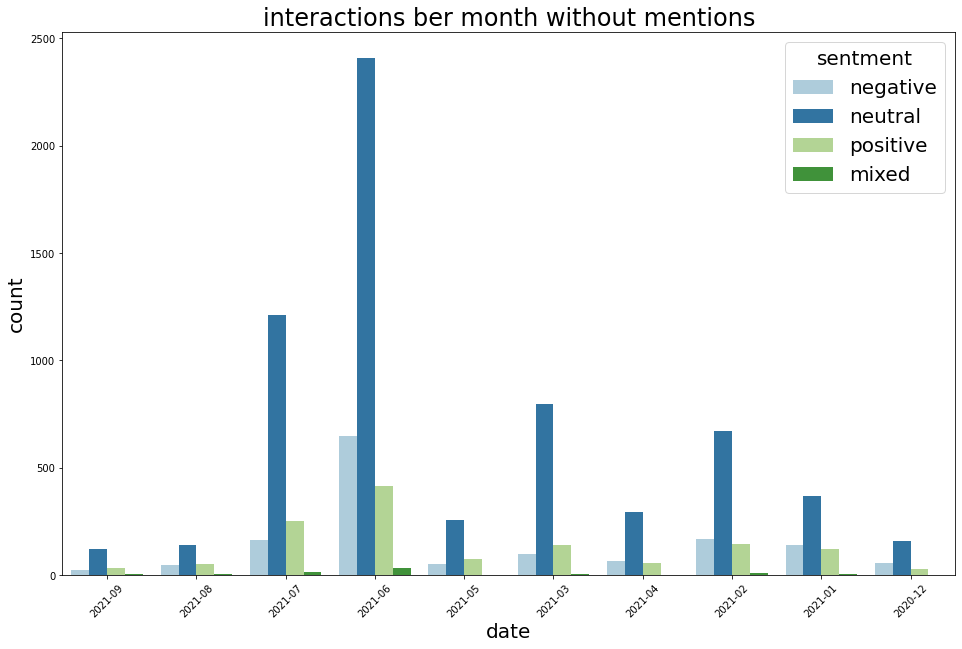

In [41]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = bdf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions')
plt.rcParams.update({'font.size':20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
_ = plt.ylabel("count")

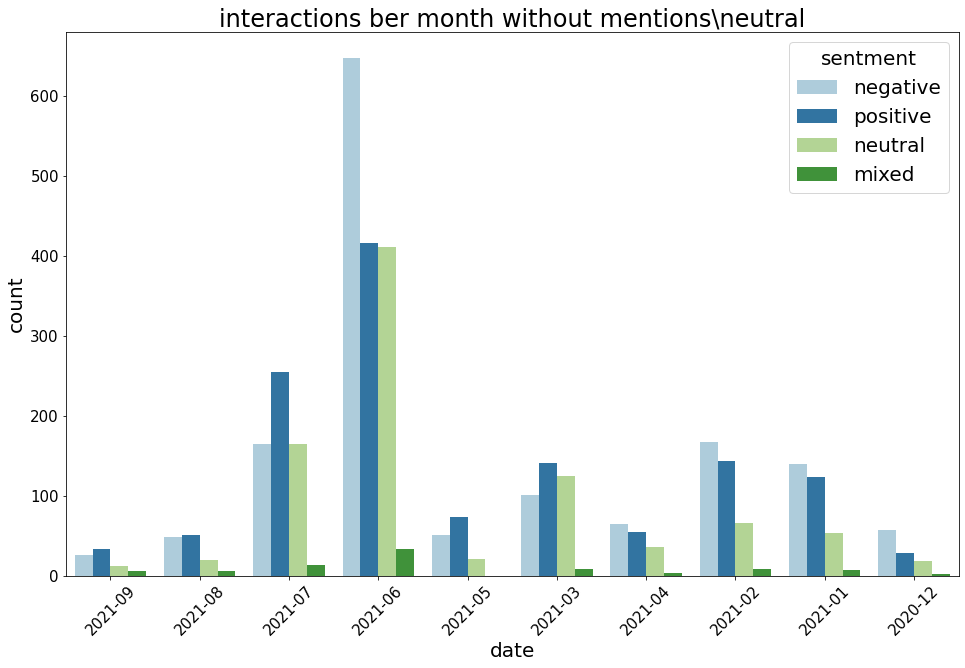

In [44]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = bndf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions\\neutral')
plt.rcParams.update({'font.size':20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
_ = plt.ylabel("count")

In [45]:
me = bdf[["neutral", "positive", "negative"]].groupby(bdf["date"]).mean()
me

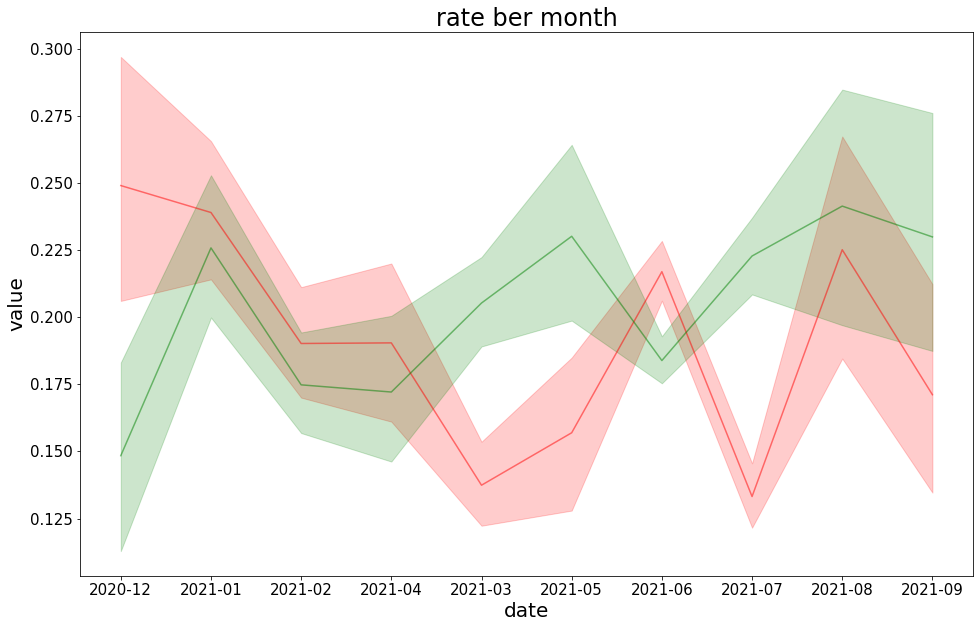

In [48]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=bdf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=bdf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('rate ber month')
_ = plt.ylabel("value")

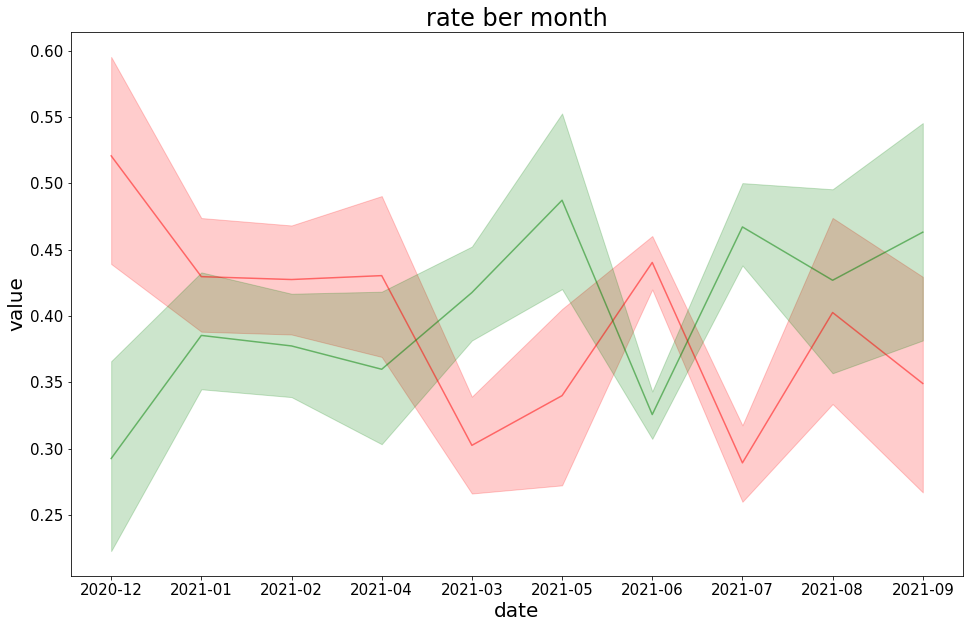

In [49]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=bndf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=bndf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('rate ber month')
_ = plt.ylabel("value")

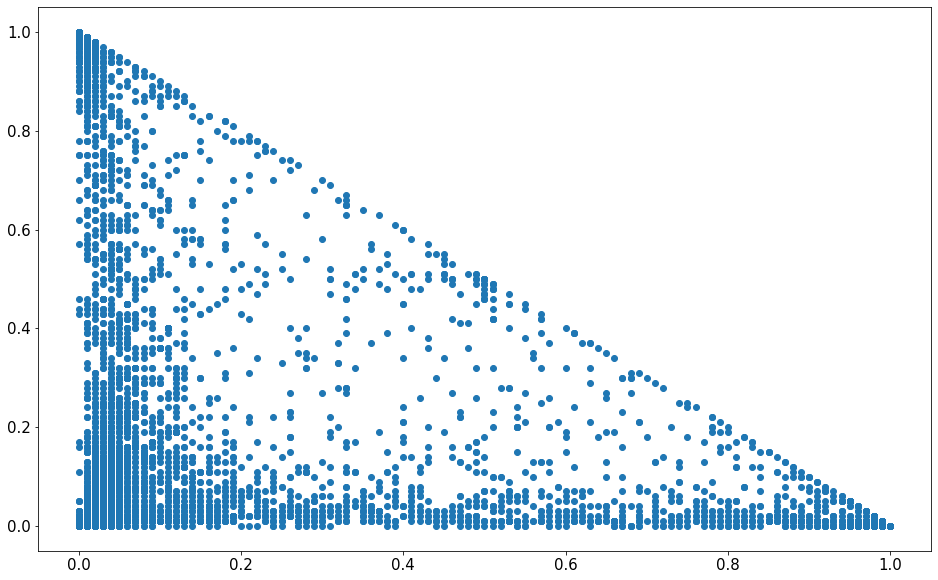

In [51]:
fig, plot = plt.subplots(figsize = (16,10))
plt.scatter(x = bdf["negative"], y =bdf["positive"] )

In [52]:
colors = sns.color_palette()

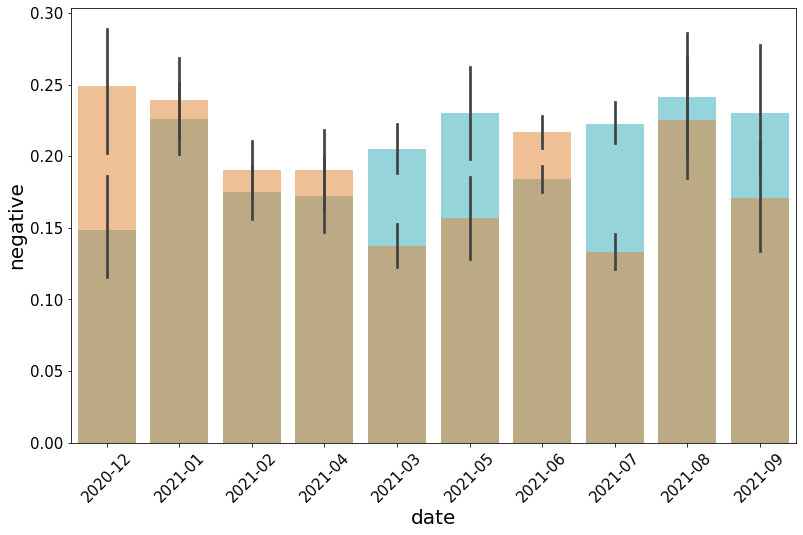

In [53]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = bdf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = bdf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)

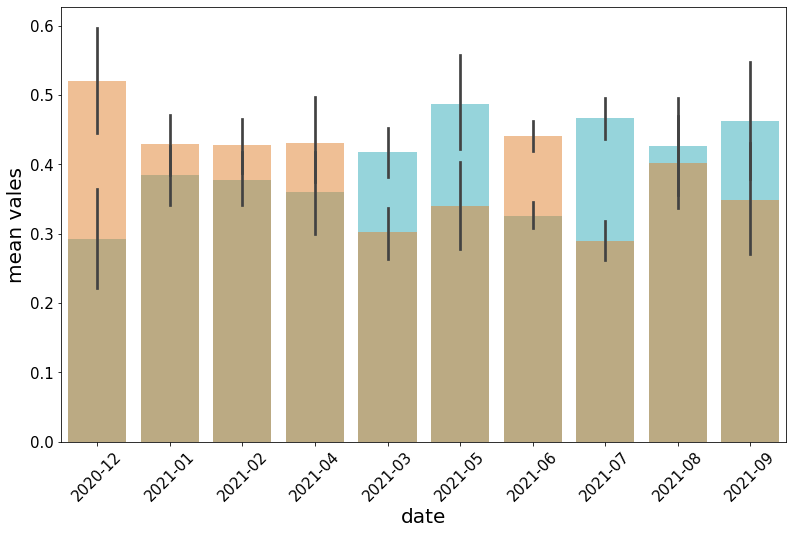

In [57]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = bndf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = bndf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.gca().invert_xaxis()
_ = plt.ylabel("mean vales")
_ = plt.xticks(rotation=45)

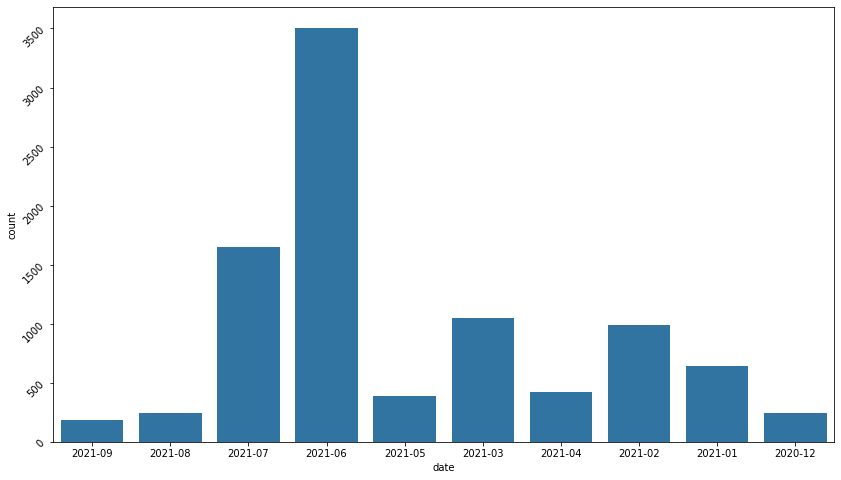

In [27]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = bdf,x = "date", color = colors[0])
_ = plt.yticks(rotation=45)

In [60]:
df.query('sentment == "negative"').sample(10)

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
5074,2021-06-23,الشرح مختصر جدا انا عارف انها مراجعة بس في بعض...,223722039584282_223887966234356,"The explanation is very brief, I know that it ...",F,negative,0.10,0.39,0.51,2021-06
5715,2021-06-30,ليه لما بخلص لامتحان مش بيعمل إنهاء ؟,219601213329698_531452844662528,"Why when I finish an exam, he doesn't do an en...",F,negative,0.05,0.24,0.71,2021-06
9262,2021-06-06,مش شغال علي التابلت الوزاره ليه,209754537647699_213355767287576,why doesn't he work on the ministry table,F,negative,0.00,0.04,0.96,2021-06
8811,2021-06-02,مش بيفتح وده ابتزاز للدعايه للصفحة,210979144191905_211028024187017,It doesn't open and this is blackmail for adve...,F,negative,0.00,0.00,1.00,2021-06
9301,2021-06-05,في اسئله حالها غلط ع المنصه,209754537647699_212894760667010,There are questions that are wrong on the stage,F,negative,0.00,0.00,1.00,2021-06
12294,2021-02-23,مستر انا بتلغبط في اعداد التأكسد\nوياريت تشرح ...,150562763566877_150564683566685,Mr I am depressed in the oxidization numbers,F,negative,0.18,0.00,0.82,2021-02
2744,2021-07-06,هو ليه مفيش لغه المانيه ؟!,231099645513188_231465482143271,Why is there no German language?,F,negative,0.04,0.45,0.51,2021-07
6664,2021-06-11,بطاريته خربانة مبتكملش 5 ساعات,476658276760586_476674690092278,Its battery is broken it lasts 5 hours,F,negative,0.00,0.00,1.00,2021-06
6442,2021-06-15,حضرتك لو طالب ادبي و مادته للغه الثانيه الماني...,218338200122666_218959826727170,If you are a literary student and its subject ...,F,negative,0.11,0.34,0.55,2021-06
9873,2021-05-15,تبخل ململ,197949638828189_199881045301715,Stingy melmel,F,negative,0.00,0.01,0.99,2021-05


# live videos


In [62]:
live_df = pd.read_csv("hessas_live.csv")
live_df.head()

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id,genere
0,2021-08-01T16:28:09+0000,المشتقه التانيه بصفر,1967631546735549_1967659020066135,NaN,the other derivative is yellow,F,neutral,0.00,1.0,0.00,1967631546735549,التفاضل والتكامل
1,2021-08-01T16:01:36+0000,جزاكم الله خيرا,1967631546735549_1967633510068686,NaN,May God reward you well,F,positive,0.99,0.0,0.01,1967631546735549,التفاضل والتكامل
2,2021-08-01T16:27:15+0000,Sohaila Ibrahim,1967631546735549_1967657396732964,NaN,Sohaila Ibrahim,T,neutral,0.00,1.0,0.00,1967631546735549,التفاضل والتكامل
3,2021-08-01T16:04:01+0000,Ali Hitham Zsc,1967631546735549_1967635983401772,NaN,Ali Hitham Zsc,T,neutral,0.00,1.0,0.00,1967631546735549,التفاضل والتكامل
4,2021-08-01T16:22:39+0000,Ahmed Hegazy احمد محمود عبد البديع Ÿazaň Aýmaň,1967631546735549_1967653003400070,NaN,Ahmed Hegazy احمد محمود عبد البديع Ÿazaň Aýmaň,T,neutral,0.00,1.0,0.00,1967631546735549,التفاضل والتكامل


In [110]:
## setup time
live_df.created_time =  live_df["created_time"].str.slice(0, 10)
live_df["date"] = live_df["created_time"].str.slice(0, 7)
live_df.created_time

0        2021-08-01
1        2021-08-01
10       2021-08-01
14       2021-08-01
16       2021-08-01
            ...    
38150    2020-12-30
38151    2020-12-30
38152    2020-12-30
38153    2020-12-30
38154    2020-12-30
Name: created_time, Length: 26478, dtype: object

In [67]:
live_df = live_df.query('is_human != "T"')

In [77]:
live_df.query('genere == "العربية"').sample(20)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id,genere
14616,2021-07-08T18:14:55+0000,ماشي بصوت سعد الصغير,339098197702579_140489294832717,NaN,Ok with saad al Saghir voice,F,neutral,0.09,0.83,0.08,339098197702579,العربية
13436,2021-07-08T17:31:29+0000,ضيفا,339098197702579_207772754457816,NaN,Guest,F,neutral,0.25,0.69,0.06,339098197702579,العربية
37982,2020-12-30T18:59:53+0000,مستر ممكن تحل قراءة متحررة لان صعب جداً نميز ب...,155841509303552_444983189844422,NaN,Mr. Can you solve a liberal reading because it...,F,negative,0.01,0.00,0.99,155841509303552,العربية
16688,2021-07-08T17:59:57+0000,او عيطنا عاادي بردوا😢😢💔💃💃💃,339098197702579_524568112300456,NaN,He's a adi Bardova😢😢💔💃💃💃,F,neutral,0.10,0.88,0.02,339098197702579,العربية
13467,2021-07-08T17:30:24+0000,مجزوم بلام الأمر لأنه مش فاء سببيه مش مسبوقة ب...,339098197702579_874273693443674,NaN,It is necessary to blame the matter because it...,F,negative,0.00,0.00,1.00,339098197702579,العربية
17141,2021-07-08T17:37:00+0000,زائد,339098197702579_359871112207381,NaN,More,F,neutral,0.15,0.78,0.07,339098197702579,العربية
27204,2021-06-27T17:34:00+0000,حرف الجر من زائد ليه معلش ممكن شرحه تاني,4100025866757033_4100109796748640,NaN,the traction letter from plus why its ok can i...,F,neutral,0.08,0.86,0.06,4100025866757033,العربية
16008,2021-07-08T17:24:23+0000,ساعه أما يشرحروا عربي يجيبوا مدرس الدغ في ال ر,339098197702579_103100845341847,NaN,When they explain Arabic they bring a teacher ...,F,neutral,0.01,0.95,0.04,339098197702579,العربية
16703,2021-07-08T18:06:34+0000,أ,339098197702579_957230251707582,NaN,a,F,neutral,0.30,0.64,0.06,339098197702579,العربية
19425,2021-07-08T18:16:35+0000,يا مستر حل معانا كتيررررر كفاية شرح🙄🙃,339098197702579_1604461723093043,NaN,Mr. Please come with us a lot. Enough explanat...,F,neutral,0.13,0.83,0.04,339098197702579,العربية


In [139]:
live_df["Translate"][13467]

'It is necessary to blame the matter because it is not a causality that is not preceded by denial or request '

In [84]:
live_df.genere.value_counts()

array([9735, 6006, 2247, 1839, 1216,  903,  811,  805,  732,  544,  532,
        483,  422,  139,   25,   22,   17], dtype=int64)

In [99]:
data_lis = word_correntor(live_df.genere.value_counts())


In [100]:
data_lis

ﺔﻴﺑﺮﻌﻟا                    9735
ﺔﻳﺰﻴﻠﺠﻧﻹا_ﺔﻐﻠﻟا            6006
ﺦﻳرﺎﺘﻟا                    2247
ﺔﻔﺴﻠﻔﻟا                    1839
ﺔﻴﻧﺎﺒﺳﻹا                   1216
ﺎﻴﻓاﺮﻐﺠﻟا                   903
عﺎﻤﺘﺟﻻاو_ﺲﻔﻨﻟا_ﻢﻠﻋ          811
ﺎﻴﺟﻮﻟﻮﻴﺠﻟا                  805
ءﺎﻴﻤﻴﻜﻟا                    732
ﺔﻴﻧﺎﻤﻟﻷا                    544
ﺔﻴﻟﺎﻄﻳﻹا                    532
ءﺎﻴﺣﻷا                      483
ءﺎﻳﺰﻴﻔﻟا                    422
ﺔﻴﻏاﺮﻔﻟا_ﺔﺳﺪﻨﻬﻟاو_ﺮﺒﺠﻟا     139
ﺎﻜﻴﺗﺎﺘﺳﻻا                    25
ﺎﻜﻴﻣﺎﻨﻳﺪﻟا                   22
ﻞﻣﺎﻜﺘﻟاو_ﻞﺿﺎﻔﺘﻟا             17
dtype: int64

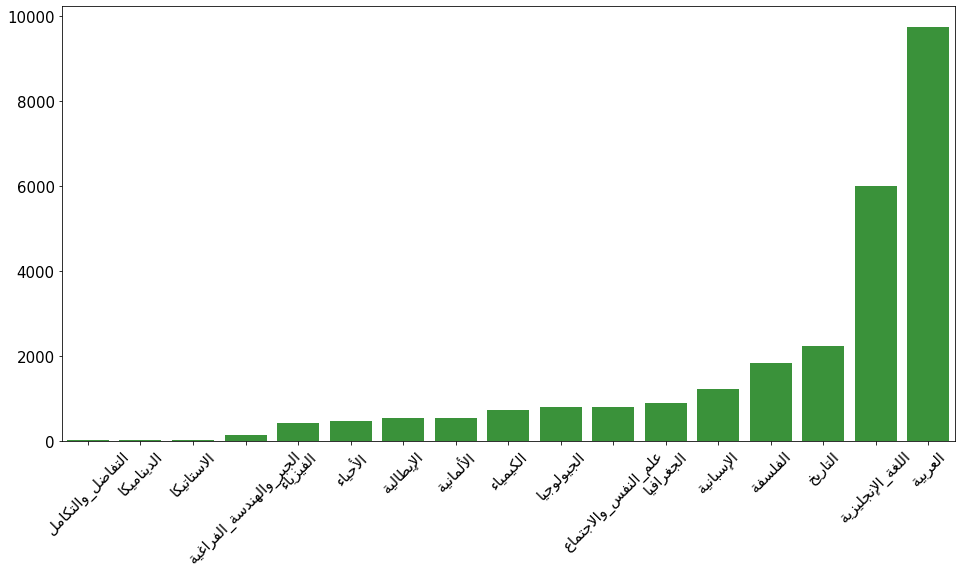

In [107]:
plot = plt.subplots(figsize = (16,8))
sns.barplot(x = data_lis.index, y = data_lis.values, color = colors[2])
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)


In [131]:
groupd = live_df.groupby("date").head()
live_df

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id,genere,date
0,2021-08-01,المشتقه التانيه بصفر,1967631546735549_1967659020066135,NaN,the other derivative is yellow,F,neutral,0.00,1.00,0.00,1967631546735549,التفاضل والتكامل,2021-08
1,2021-08-01,جزاكم الله خيرا,1967631546735549_1967633510068686,NaN,May God reward you well,F,positive,0.99,0.00,0.01,1967631546735549,التفاضل والتكامل,2021-08
10,2021-08-01,يارب امنيه تكرمها بهندسة,1967631546735549_1967635893401781,NaN,I hope You honor Amania with engineering,F,positive,1.00,0.00,0.00,1967631546735549,التفاضل والتكامل,2021-08
14,2021-08-01,AH M ED,1967631546735549_1967656610066376,NaN,AH M ED,F,neutral,0.08,0.83,0.09,1967631546735549,التفاضل والتكامل,2021-08
16,2021-08-01,يا رب كل ايد تحوقل تجيب فوق ال90%,1967631546735549_1967643383401032,NaN,I hope that every hand that is transferred wil...,F,positive,1.00,0.00,0.00,1967631546735549,التفاضل والتكامل,2021-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38150,2020-12-30,مستر هل .....اول .... اسم تفضيل فعله وايه\\\\\...,155841509303552_1728188824056377,NaN,Mr. Do..... First.... What's the name of prefe...,F,neutral,0.12,0.85,0.03,155841509303552,العربية,2020-12
38151,2020-12-30,مستر هل .....اول .... اسم تفضيل فعله وايه\\\\\...,155841509303552_5758928257481573,NaN,Mr. Do..... First.... What's the name of prefe...,F,neutral,0.12,0.85,0.03,155841509303552,العربية,2020-12
38152,2020-12-30,مستر هل .....اول .... اسم تفضيل فعله وايه\\\\\...,155841509303552_444985906510817,NaN,Mr. Do..... First.... What's the name of the p...,F,neutral,0.12,0.86,0.02,155841509303552,العربية,2020-12
38153,2020-12-30,مستر هل .....اول .... اسم تفضيل فعله وايه\\\\\...,155841509303552_444985823177492,NaN,Mr. Do..... First.... What's the name of the p...,F,neutral,0.12,0.86,0.02,155841509303552,العربية,2020-12


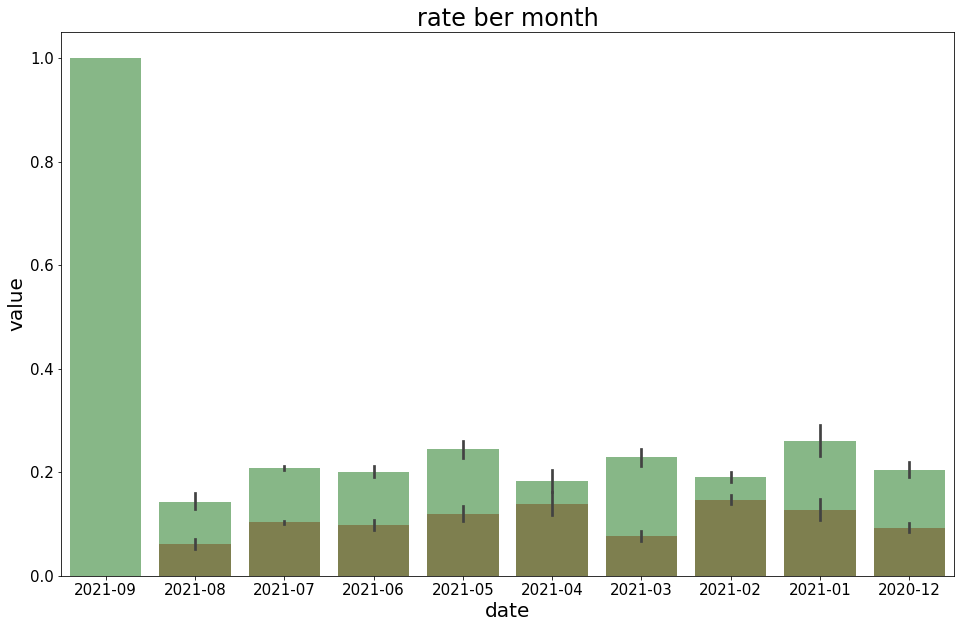

In [138]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.barplot(data=live_df, x="date", y="negative", color = "r", alpha = 0.5, order = ["2020-12", "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09" ])
plot = sns.barplot(data=live_df, x="date", y="positive", color = "g", alpha = 0.5, order = ["2020-12", "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09" ])

plt.gca().invert_xaxis()
plt.title('rate ber month')
_ = plt.ylabel("value")